# Наилучшее среднеквадратичное приближение функции

\subsection{Задача 1}

Проблема наилучшего среднеквадратичного приближения формулируется следующим образом. Пусть задана функция ${f(x)=x\ln{(x+2)}}$ на отрезке $[a,b]$. Тогда необходимо
1. имея некоторую функцию $f(x)$, которую трудно вычислить, мы будем заменять ее другой функцией $\varphi(x,a)$, где $a$ --- векторный параметр, которую легко вычислить;
2. имея значения функции $f(x_i)$ в одних точках, найти значения функции в других точках.

In [1]:
import math
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.options.display.float_format ='{:,.7f}'.format

In [2]:
def f(x):
    return x * np.log(x + 2)

Задачи приближения функции можно классифицировать на линейные и нелинейные. Задача считается линейной, если множество, из которого мы берем функцию $\varphi(x)$ является линейным. Соответственно при решении задачи мы будем также разделять способы построения приближения на линейные и нелинейные.

Сперва рассмотрим алгоритм построения линейного наилучшего среднеквадратичного приближения. Поскольку в данном случае мы строим среднеквадратичное приближение в линейном пространстве, то в качестве такого пространства будем рассматривать гильбертово пространство $H$, так как из теории функционального анализа известно, что существует единственный элемент наилучшего приближения в таком пространстве.

Пусть подпространство $\Phi$ порождено элементами $\varphi_0,\varphi_1,\ldots, \varphi_n$. Обозначим $\Phi_0$ --- элемент наилучшего приближения к $f$ в $\Phi$. Поскольку $\Phi_0 \in \Phi$, то он представим в виде линейной комбинации $$\Phi_0 = \sum_{i=0}^{n}c_i\varphi_i.$$
 Задача отыскания $\Phi_0$ равносильна отысканию коэффициентов $c_0,\ldots, c_n$ таких, чтобы выполнялось равенство $$(f-\Phi_0, \varphi) = 0\ \forall \varphi \in \Phi.$$
 Последнее равенство равносильно системе условий вида $$(f-\Phi_0, \varphi_j) = 0, j = 0,1,\ldots, n.$$
 Эти равенства представляют собой систему линейных алгебраических уравнений вида $$\begin{cases}
 	c_0(\varphi_0,\varphi_0) + \ldots + c_n(\varphi_n, \varphi_n) = (f,\varphi_0),\\
 	\vdots\\
 	c_0(\varphi_0,\varphi_n) + \ldots + c_n(\varphi_n, \varphi_n) = (f,\varphi_n)
 \end{cases}$$
 
  Таким образом, для построения элемента наилучшего приближения в гильбертовом пространстве необходимо сделать два пункта
1. выбрать систему базисных элементов $\varphi_0,\ldots, \varphi_n$ подпространства $\Phi$;
2. составить и решить систему указанную выше.

 Пусть $H = L_2(p)[a,b]$ --- пространство вещественнозначных функций интегрируемых с квадратом на отрезке $[a,b]$ по весу $p(x)$. Норма в этом пространстве задается как $$||f|| = (f,f)^{\frac12} = \Big(\int\limits_a^b p(x) f^2(x)dx\Big)^{\frac12}.$$
Скалярное произведение как $$(f,g) = \int\limits_a^b p(x) f(x) g(x)dx.$$
При этом вес $p(x)$ удовлетворяет условиям:
1. $p(x) \geq 0$ $\forall x \in [a,b]$;
2. $p(x)$ обращается в ноль не более чем на множестве меры нуль.

### Наилучшее полиномиальное среднеквадратичное приближение для непрерывно заданной функции
#### Теоретические выкладки
В качестве системы базисных функций возьмем функции $1, x, \ldots, x^n$, или $\varphi_i = x^i$, $i=\overline{0,n}$. Обобщенный многочлен в этом случае превращается в алгебраический многочлен вида $$\varphi = P_n(x) = \sum_{i=0}^{n}c_ix^i,\quad c_i \in\mathbb{R}$$
Согласно общей теории существует единственный элемент $\varphi^* = P_n^*(x)$, который дает наилучшее приближение данной функции $f$ в пространстве $H$.
Для того, чтобы задать $P_n^*$ нужно решить систему с выбранными базисными функциями $\varphi_i$, которая в данном случае примет следующий вид $$\begin{cases}
 	c_0s_0 + c_1s_1 + \ldots + c_ns_n = m_0,\\
 	c_0s_1 + c_1s_2 + \ldots + c_ns_{n+1} = m_1,\\
 	\vdots\\
 	c_0s_n + c_1s_{n+1} + \ldots + c_ns_{2n} = m_n.
 \end{cases}$$
 $$s_i = \int\limits_a^b p(x) x^i dx,\quad m_j= \int\limits_a^b p(x) f(x) x^j dx,\quad i=\overline{0,2n}, j=\overline{0,n}.$$
 
 #### Построение приближения многочленом первой степени
Попробуем построить приближение функции $f(x) = x\ln (x+2)$ заданной на отрезке $[a,b]=[0, 1]$ с помощью линейной функции $$\varphi(x) = c_0 + c_1x.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0 s_0 + c_1 s_1 = \int\limits_{0}^1 x\ln (x+2) dx,\\
c_0 s_1 + c_1 s_2 = \int\limits_{0}^1 x^2\ln (x+2) dx;
\end{cases}$$
где $$s_i = \int\limits_a^b x^idx = \dfrac{x^{i+1}}{i+1}\Big|_a^b =\dfrac{b^{i+1}}{i+1} -\dfrac{a^{i+1}}{i+1} = \dfrac{1}{i+1}$$
Предварительно построим алгоритм, который будет составлять матрицу $$G(n, a,b) = \begin{pmatrix}s_0 & s_1 & \dots & s_n\\ s_1 & s_2 & \dots & s_{n+1} \\ \vdots & \vdots & \ddots & \vdots \\ s_n & s_{n+1} & \dots & s_{2n}\end{pmatrix}$$
Таким образом, мы можем компьютерно сразу вычислять значение матрицы $G$, избегая подсчета достаточно простых интегралов.

In [3]:
n = 2
a, b = 0, 1

def G(n, a, b):
    g = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            g[i, j] = b**(i + j + 1) / (i + j + 1) - a**(i + j + 1) / (i + j + 1)
        
    return g

print(G(n, a, b))

[[1.         0.5       ]
 [0.5        0.33333333]]


Вычислим значения каждого из интегралов в правой части
$$\int\limits_{0}^1 x\ln (x+2) dx = \dfrac{\left(x+2\right)\left(2\left(x-2\right)\ln\left(x+2\right)-x+6\right)}{4} \Big|_{0}^1,$$
$$\int\limits_{0}^1 x^2\ln (x+2) dx = \dfrac{\left(3x^3+24\right)\ln\left(x+2\right)-x^3+3x^2-12x}{9}\Big|_{0}^1$$
Найдем значения наших интегралов.

In [4]:
def M():
    global a, b, n
    
    m = np.zeros(n)
    
    for i in range(n):
        m[i] = integrate.quad(lambda x: x**(i + 1) * np.log(x + 2), a, b)[0]

    m = np.reshape(m, (n, 1))
    
    return m

m = M()

print(m)

[[0.48837593]
 [0.33633327]]


Получили систему вида 
$$\begin{cases}
 	1c_0 + 0.5c_1 = 0.48837593,\\
 	0.5c_0 + 0.3333333c_1 = 0.33633327.
 \end{cases}$$
 Решив которую, мы получим коэффициенты нашего многочлена, для этого воспользуемся схемой единственного деления, рассмотренную в курсе ВМА прошлого семестра.

In [5]:
import system_solution

coef = system_solution.single_division_scheme(G(n, a, b), m, n)

print(coef)

[[-0.06449593]
 [ 1.10574371]]


Итого, получили, что $c_0 = -0.06449593, c_1 = 1.10574371$, и наш многочлен имеет вид $$\varphi(x) = -0.06449593 + 1.10574371x$$

In [6]:
def phi(x):
    global coef, n
        
    return sum(coef[i] * x**i for i in range(n))

Посмотрим на поведение построенной функции и нашей функции на отрезке $[0, 1]$.

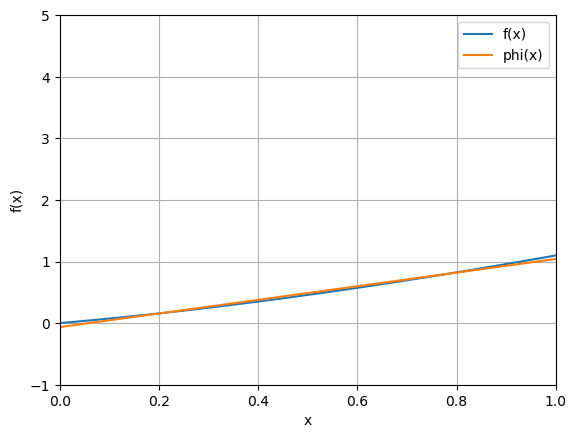

In [7]:
x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(0, 1)
ax.set_ylim(-1, 5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Для более четкой картины рассмотрим поведение функция на отрезке $[-5, 5]$.

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x + 2)


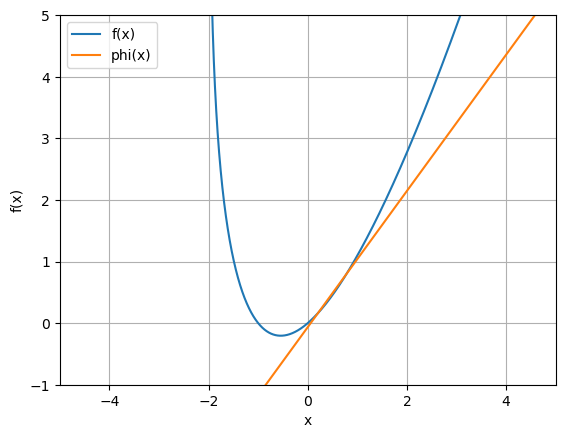

In [8]:
x = np.linspace(-5, 5, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Можно сделать вывод о том, что на рассматриваемом отрезке мы получили достаточно близкую функцию, однако на более широком отрезке видно, что простой прямой нам недостаточно.

Рассчитаем среднеквадратичное отклонение функции от ее приближения:
$$|| f(x) - \varphi(x) || ^2 = \int\limits_0^1 (x\ln (x+2) + 0.06449593 - 1.10574371x)^2\ dx.$$
Вычисление этого интеграла реализуем компьютерными методами интегрирования, так как аналитическое интегрирование будет достаточно объемным *(насколько удалось выяснить, данный компьютерный алгоритм реализует метод квадратур Кертиса-Кленшоу с многочленами Чебышева)*. В качестве результата функция возвращает значение интеграла и погрешность его вычисления.

Для этого определим подинтегральную функцию для более удобной работы с функцией.

In [9]:
def func(x):
    return (f(x) - phi(x))**2

In [10]:
integrate.quad(func, a, b)

(0.0007377439531837763, 8.19060323102612e-18)

Таким образом, $$||f(x) - \varphi(x)||^2 = 0.0007377439531837763.$$
В целом, на нашем отрезке, как и ожидалось, получился неплохой показатель, однако вспомним поведение функций на отрезке $[-5, 5]$ и сделаем вывод о том, что нам нужна более сложная функция, поэтому перейдём к построению многочлена второй степени.

#### Построение приближения многочленом второй степени
Попробуем построить приближение функции $f(x) = x\cos x$ заданной на отрезке $[a,b]=[0, 2]$ с помощью квадратичной функции $$\varphi(x) = c_0 + c_1x +c_2x^2.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0 s_0 + c_1 s_1 + c_2s_2 = \int\limits_{0}^1 x\ln (x+2) dx,\\
c_0 s_1 + c_1 s_2 + c_2 s_3 = \int\limits_{0}^1 x^2\ln (x+2) dx,\\
c_0 s_2 + c_1 s_3 + c_2s_4 = \int\limits_{0}^1 x^3\ln (x+2) dx;\\
\end{cases}$$
где $$s_i = \int\limits_a^b x^idx = \dfrac{x^{i+1}}{i+1}\Big|_0^1 = \dfrac{1}{i+1}.$$

In [11]:
n = 3

print(G(n, a, b))

[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


Вычислим значения каждого из интегралов в правой части
$$\int\limits_{0}^1 x\ln (x+2) dx = \dfrac{\left(x+2\right)\left(2\left(x-2\right)\ln\left(x+2\right)-x+6\right)}{4} \Big|_{0}^1= -\dfrac{3\ln\left(3\right)}{2}+2\ln\left(2\right)+\dfrac{3}{4},$$
$$\int\limits_{0}^1 x^2\ln (x+2) dx = \dfrac{\left(3x^3+24\right)\ln\left(x+2\right)-x^3+3x^2-12x}{9}\Big|_{0}^1= 3\ln\left(3\right)-\dfrac{8\ln\left(2\right)}{3}-\dfrac{10}{9},$$
$$\int\limits_{0}^1 x^3\ln (x+2) dx = \dfrac{x^4\ln\left(x+2\right)}{4}-\dfrac{16\ln\left(x+2\right)+\frac{3x^4-8x^3+24x^2-96x}{12}}{4}\Big|_{0}^1 = -\dfrac{15\ln\left(3\right)}{4}+4\ln\left(2\right)+\dfrac{77}{48}.$$
Найдем значения наших интегралов.

In [12]:
m = M()

print(m)

[[0.48837593]
 [0.33633327]
 [0.25695931]]


Получили систему вида 
$$\begin{cases}
 	1c_0 + 0.5c_1 + 0.3333333c_2 = 0.48837593,\\
 	0.5c_0 + 0.3333333c_1 + 0.25c_2= 0.33633327, \\
    0.3333333c_0 + 0.25c_1 + 0.2c_2 = 0.25695931.
 \end{cases}$$
 Решив которую, мы получим коэффициенты нашего многочлена, для этого воспользуемся схемой единственного деления, рассмотренную в курсе ВМА прошлого семестра.

In [13]:
coef = abs(system_solution.single_division_scheme(G(n, a, b), m, n))

print(coef)

[[0.0038353 ]
 [0.74177993]
 [0.36396378]]


Итого, получили, что $c_0 = 0.0038353, c_1 = 0.74177993 , c_2 = 0.36396378$, и наш многочлен имеет вид $$\varphi(x) = 0.0038353 + 0.74177993x + 0.36396378x^2$$
Посмотрим на поведение построенной функции и нашей функции на отрезке $[0, 1]$.

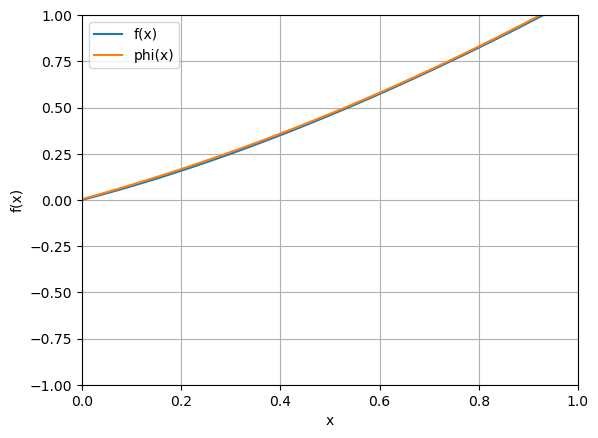

In [14]:
x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Опять-таки на нашем отрезке поведение функций похоже, рассмотрим поведение на более широком отрезке $[-5, 5]$.

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x + 2)


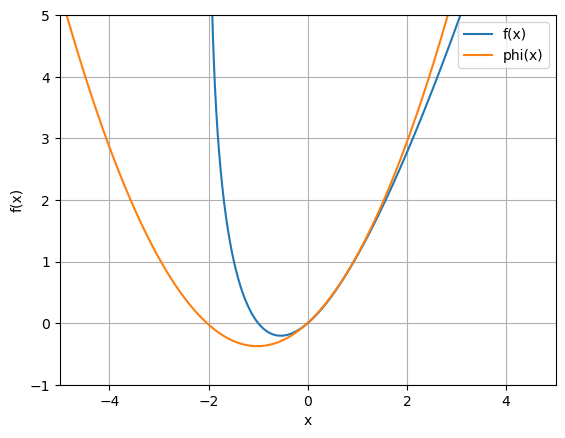

In [15]:
x = np.linspace(-5, 5, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

В этот раз функция уже лучше себя ведет, но все еще не достаточно хорошо.

Рассчитаем среднеквадратичное отклонение функции от ее приближения:
$$|| f(x) - \varphi(x) || ^2 = \int\limits_0^1 (x\ln (x+2) - 0.0038353 - 0.74177993x - 0.36396378x^2)^2\ dx.$$
Вычисление этого интеграла реализуем компьютерными методами интегрирования, так как аналитическое интегрирование будет достаточно объемным *(насколько удалось выяснить, данный компьютерный алгоритм реализует метод квадратур Кертиса-Кленшоу с многочленами Чебышева)*. В качестве результата функция возвращает значение интеграла и погрешность его вычисления.

In [16]:
integrate.quad(func, a, b)

(6.06395536080281e-05, 6.732342861862428e-19)

Таким образом, $$||f(x) - \varphi(x)||^2 = 6.06395536080281 * 10^{-5}.$$
Отклонение стало еще меньше, но, на более широком отрезке расхождение достаточно сильное. Можно посмотреть на отклонение на отрезке $[-2, 2]$ для проверки этого факта.

In [17]:
integrate.quad(func, -2, 2)

(7.705090586298117, 7.493224973842416e-08)

Получили отклонение равное $14.70756553$, поэтому продолжаем увеличивать степень многочлена.

#### Построение приближения многочленом третьей степени
Попробуем построить приближение функции $f(x) = x\cos x$ заданной на отрезке $[a,b]=[0, 2]$ с помощью квадратичной функции $$\varphi(x) = c_0 + c_1x +c_2x^2 + c_3x^3.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0 s_0 + c_1 s_1 + c_2s_2 + c_3s_3= \int\limits_{0}^1 x\ln (x+2) dx,\\
c_0 s_1 + c_1 s_2 + c_2 s_3 + c_3s_4 = \int\limits_{0}^1 x^2\ln (x+2) dx,\\
c_0 s_2 + c_1 s_3 + c_2s_4 + c_3s_5 = \int\limits_{0}^1 x^3\ln (x+2) dx,\\
c_0 s_3 + c_1 s_4 + c_2s_5 + c_3 s_6= \int\limits_{0}^1 x^4\ln (x+2) dx
\end{cases}$$
где $$s_i = \int\limits_a^b x^idx = \dfrac{x^{i+1}}{i+1}\Big|_0^1 = \dfrac{1}{i+1}$$

Проведем те же операции, что выполнили в прошлых пунктах.

In [18]:
n = 4

print(G(n, a, b))

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


In [19]:
m = M()

print(m)

[[0.48837593]
 [0.33633327]
 [0.25695931]
 [0.20803248]]


Получили коэффициенты для системы, решив которую, получим коэффициенты для нашего многочлена.

In [20]:
coef = system_solution.single_division_scheme(G(n, a, b), m, n)

print(coef)

[[-2.92036160e-04]
 [ 6.99260795e-01]
 [ 4.70261618e-01]
 [-7.08652230e-02]]


Сразу, опираясь на предыдущий опыт, перейдем к рассмотрению отрезка $[-2, 2]$.

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: divide by zero encountered in log
  return x * np.log(x + 2)


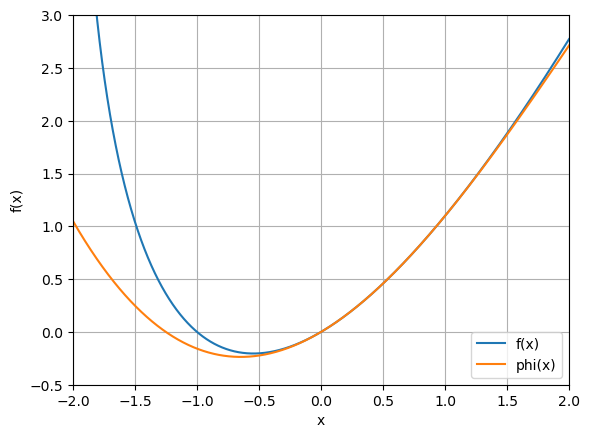

In [21]:
x = np.linspace(-2, 2, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, 3)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

И снова можем наблюдать улучшения, однако достаточно хорошего совпадения всё еще нет. Вычислим среднеквадратичное отклонение. 

In [22]:
integrate.quad(func, 0, 1)

(8.003258165698814e-09, 8.885401487578119e-23)

Среднеквадратичное отклонения на нашем отрезке стало еще ниже, что ожидаемо, и теперь равно $8.003258165698814 * 10^{-9}$.Посмотрим, чему равно среднеквадратичное отклонения на отрезке $[-2, 2].$

In [23]:
integrate.quad(func, -2, 2)

(4.934646060901575, 1.794422033185583e-08)

В сравнении с прошлым случаем отклонение стало ниже, но не достаточно, поэтому перейдем к рассмотрению многочлена четвертой степени.

#### Построение приближения многочленом четвертой степени
Попробуем построить приближение функции $f(x) = x\ln (x+2)$ заданной на отрезке $[a,b]=[0, 1]$ с помощью квадратичной функции $$\varphi(x) = c_0 + c_1x +c_2x^2 + c_3x^3 + c_4x^4.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0 s_0 + c_1 s_1 + c_2s_2 + c_3s_3 + c_4s_4= \int\limits_{0}^1 x\ln (x+2) dx,\\
c_0 s_1 + c_1 s_2 + c_2 s_3 + c_3s_4 + c_4s_5 = \int\limits_{0}^1 x^2\ln (x+2) dx,\\
c_0 s_2 + c_1 s_3 + c_2s_4 + c_3s_5 + c_4s_6= \int\limits_{0}^1 x^3\ln (x+2) dx,\\
c_0 s_3 + c_1 s_4 + c_2s_5 + c_3s_6 + c_4s_7= \int\limits_{0}^1 x^4\ln (x+2) dx, \\
c_0 s_4 + c_1 s_5 + c_2s_6 + c_3s_7 + c_4s_8= \int\limits_{0}^1 x^5\ln (x+2) dx.
\end{cases}$$
где $$s_i = \int\limits_a^b x^idx = \dfrac{x^{i+1}}{i+1}\Big|_0^1 = \dfrac{1}{i+1}$$

In [24]:
n = 5

print(G(n, a, b))

m = M()

print(m)

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
[[0.48837593]
 [0.33633327]
 [0.25695931]
 [0.20803248]
 [0.17480756]]


Решив эту систему получим коэффициенты для многочлена четвертой степени.

In [25]:
coef = system_solution.single_division_scheme(G(n, a, b), m, n)

print(coef)

[[-2.44155810e-05]
 [ 6.93908383e-01]
 [ 4.94347470e-01]
 [-1.08332104e-01]
 [ 1.87334406e-02]]


И снова, будем рассматривать сразу более широкий отрезок для наглядности.

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x + 2)


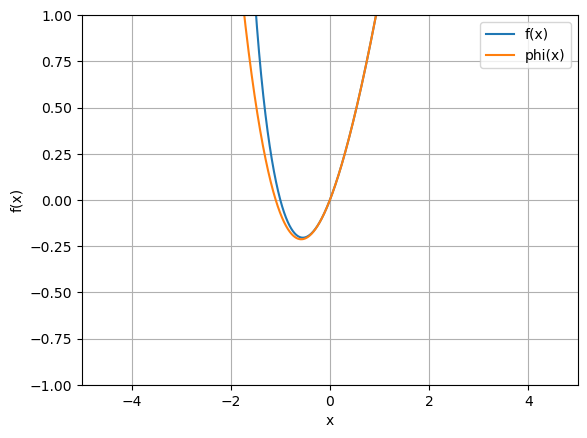

In [26]:
x = np.linspace(-5, 5, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [27]:
integrate.quad(func, 0, 1)

(4.539433525664945e-11, 6.858357938669617e-22)

По сложившейся традиции, среднеквадратичное отклонение стало еще ниже на рассматриваемом отрезке. Вычислим отклонение на отрезке $[-2, 2]$.

In [28]:
integrate.quad(func, -2, 2)

(3.621002053772873, 2.7883077180490545e-08)

Оно практически не изменилось, но график визуально стал точнее, продолжим рассуждения подобным образом и сразу перейдем к рассмотрению многочлена восьмой степени.

#### Построение многочлена восьмой степени

[[-1.75195775e-09]
 [ 6.93147340e-01]
 [ 4.99996421e-01]
 [-1.24965543e-01]
 [ 4.14906756e-02]
 [-1.50960922e-02]
 [ 5.26349870e-03]
 [-1.43101835e-03]
 [ 2.07010178e-04]]


C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x + 2)


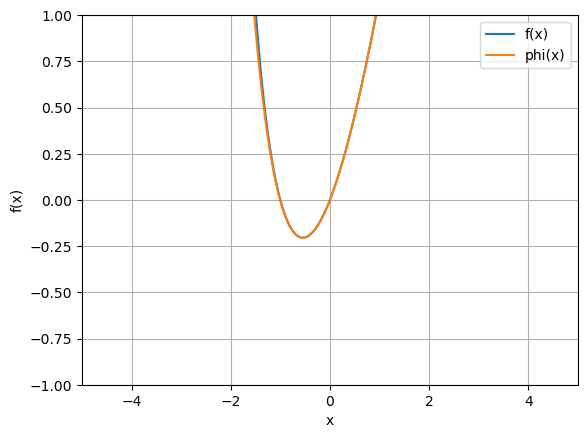

In [29]:
n = 9

m = M()

coef = system_solution.single_division_scheme(G(n, a, b), m, n)

print(coef)

x = np.linspace(-5, 5, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Получили график, котрый практически полностью совпадает с графиком исходной функции. Посмотрим на среднеквадратичное отклонение на отрезке $[0, 1]$.

In [30]:
integrate.quad(func, 0, 1)

(1.20968070061837e-19, 3.677310321705661e-26)

In [31]:
integrate.quad(func, -2, 2)

(1.7539650880427915, 7.184443040486599e-09)

Значение отклонения на отрезке $[0, 1]$ уже минимально, на отрезке $[-2, 2]$ оно уменьшается с увеличением степени многочлена.

#### Вывод

В ходе последовательного увеличения степени многочлена стало очевидно, что, чем выше его степень, тем ближе функцию мы получаем, но на отрезке $[0, 1]$ был получен практически идеальный результат, однако при расширении рассматриваемой области можно обнаружить некоторые несостыковки. 

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x + 2)


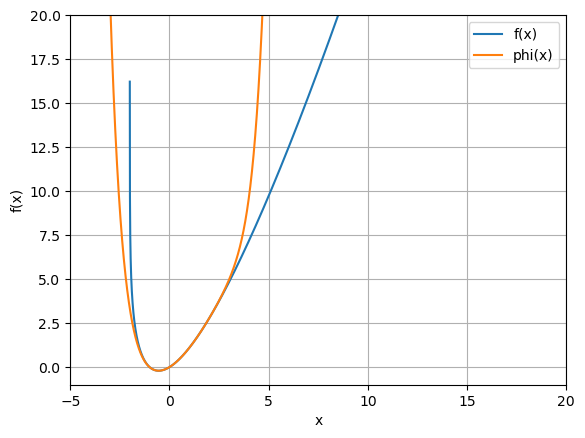

In [32]:
x = np.linspace(-5, 20, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-5, 20)
ax.set_ylim(-1, 20)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

### Метод наименьших квадратов
#### Теоретические выкладки

Предположим, что нам известны значения функции $f(x)$ на конечном множестве точек
отрезка $[a, b]$. Рассмотрим алгоритм построения среднеквадратичного приближения для
таблично заданной функции. В литературе такой алгоритм получил название метода
наименьших квадратов.
Пусть в точках $x_i$
$$a ⩽ x_0 < x_1 < ... < x_N ⩽ b$$
заданы значения функций $f(x_i), i = 0, 1, ..., N$. Для функций заданных таблично определим
скалярное произведение следующим образом

$$(f, g) = \sum_{i=0}^{N} p(x_i) f(x_i) g(x_i)$$

Тогда многочлен наилучшего среднеквадратичного приближения может быть построен по
формуле $$\varphi = P_n(x) = \sum_{i=0}^{n}c_ix^i,\quad c_i \in\mathbb{R}, $$ где коэффициенты $c_i$ являются решениями системы, которая в рассмат-
риваемом случае примет вид

$$\sum_{i=0}^{n} \left( \sum_{j=0}^{N} p(x_j) x_{j}^{i+k} \right) c_i = \sum_{j=0}^{N} p(x_j) f(x_j) x_j^k, \quad k = 0, ...,n$$

В нашем случае возьмем веса $p(x) = 1,$ тогда система примет вид

$$\sum_{i=0}^{n} \left( \sum_{j=0}^{N}x_{j}^{i+k} \right) c_i = \sum_{j=0}^{N}f(x_j) x_j^k, \quad k = 0, ...,n,$$

и формула скалярного произведения

$$(f, g) = \sum_{i=0}^{N}f(x_i) g(x_i)$$

Перейдем к реализации.

#### Многочлен первой степени
Попробуем построить приближение функции $f(x) = x\ln (x+2)$ заданной на отрезке $[a,b]=[0, 1]$ с помощью линейной функции $$\varphi(x) = c_0 + c_1x$$
Функцию мы определили еще в первой части работы. Возьмем количество точке $N = 10$.

In [33]:
N = 10
n = 2

def system():
    global N, n, a, b
    
    A = np.zeros((n, N))
    B = np.zeros((n, 1))

    x = np.linspace(a, b, N)
     
    for k in range(n):
        for i in range(N):
            A[k, i] = np.sum(x**(i+k))

        B[k] = np.sum(f(x) * (x**k))

    return A, B

A, B = system()

print(A)
print(B)

[[10.          5.          3.51851852  2.77777778  2.33699131  2.04618198
   1.84104162  1.68941613  1.57343768  1.48238155]
 [ 5.          3.51851852  2.77777778  2.33699131  2.04618198  1.84104162
   1.68941613  1.57343768  1.48238155  1.4094195 ]]
[[4.95152929]
 [3.59973973]]


Получили систему, решив которую методом единственного деления, получим коэффициенты для нашего многочлена.

In [34]:
coef = system_solution.single_division_scheme(A, B, n)

print(coef)

[[-0.05661666]
 [ 1.10353917]]


Получили коэффициенты $c_0 = -0.05661666, c_1 = 1.10353917$ и многочлен примет вид $$\varphi(x) = -0.05661666 + 1.10353917x.$$

Посмотрим на поведение функции на отрезке $[0, 1]$.

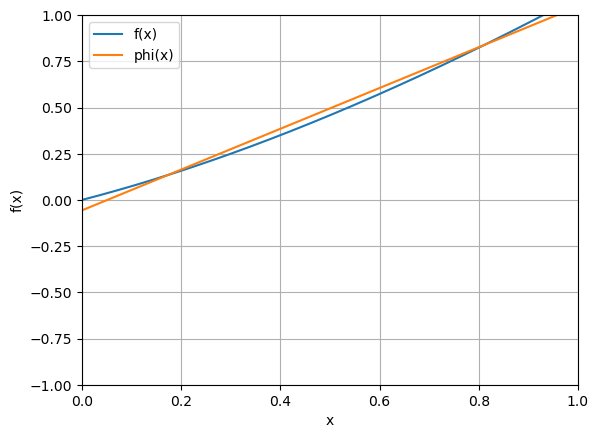

In [35]:
x = np.linspace(0, 1, 1000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

На данном отрезке видим небольшие расхождения, вычислим среднеквадратичное отклонение. 

In [36]:
def mse(x):
    return 1/N * np.sum((f(x) - phi(x))**2)

print(mse(x))

0.0786237963993482


Получили отклонение, равное примерно $0.001$, что является крайне хорошим результатом. Рассмотрим более широкий отрезок $[-2, 5].$

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: divide by zero encountered in log
  return x * np.log(x + 2)


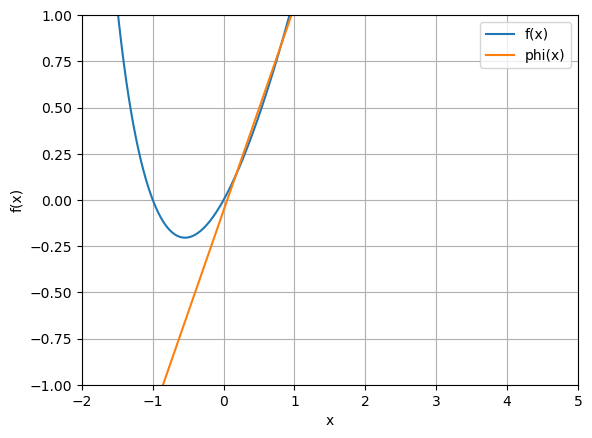

In [37]:
x = np.linspace(-2, 5, 1000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-2, 5)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

#### Многочлен четвертой степени
Опираясь на опыт работы со среднеквадратичным приближением, повысим степень многочлена сразу до четвертой
$$\varphi(x) = c_0 + c_1x + c_2x^2 + с_3x^3 + c_4x^4$$
Функцию мы определили еще в первой части работы. Возьмем количество точке тем же, $N = 10$. 

Построим систему, решив которую найдем коэффициенты для многочлена $\varphi(x)$.

In [38]:
N = 10
n = 5

def system():
    global N, n, a, b
    
    A = np.zeros((n, N))
    B = np.zeros((n, 1))

    x = np.linspace(a, b, N)
     
    for k in range(n):
        for i in range(N):
            A[k, i] = np.sum(x**(i+k))

        B[k] = np.sum(f(x) * (x**k))

    return A, B

A, B = system()

print(A)
print(B)

[[10.          5.          3.51851852  2.77777778  2.33699131  2.04618198
   1.84104162  1.68941613  1.57343768  1.48238155]
 [ 5.          3.51851852  2.77777778  2.33699131  2.04618198  1.84104162
   1.68941613  1.57343768  1.48238155  1.4094195 ]
 [ 3.51851852  2.77777778  2.33699131  2.04618198  1.84104162  1.68941613
   1.57343768  1.48238155  1.4094195   1.34999647]
 [ 2.77777778  2.33699131  2.04618198  1.84104162  1.68941613  1.57343768
   1.48238155  1.4094195   1.34999647  1.30095648]
 [ 2.33699131  2.04618198  1.84104162  1.68941613  1.57343768  1.48238155
   1.4094195   1.34999647  1.30095648  1.2600432 ]]
[[4.95152929]
 [3.59973973]
 [2.89552903]
 [2.46530354]
 [2.17636175]]


Применим к системе схему единственного деления.

In [39]:
coef = system_solution.single_division_scheme(A, B, n)

print(coef)

[[-5.94615274e-06]
 [ 6.93735550e-01]
 [ 4.94786093e-01]
 [-1.08697542e-01]
 [ 1.87996356e-02]]


Получили коэффициенты $c_0 = -5.946 * 10^{-6}, c_1 = 0.6937, c_2 = 0.4948, c_3 = -0.1087, c_4 = 0.19$, следовательно, многочлен примет вид $$\varphi(x) = -5.946 * 10^{-6} + 0.6937x + 0.4948x^2 -0.1087x^3 + 0.19 x^4.$$ Рассмотрим поведение функций сразу на отрезке $[-2, 5].$

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: divide by zero encountered in log
  return x * np.log(x + 2)


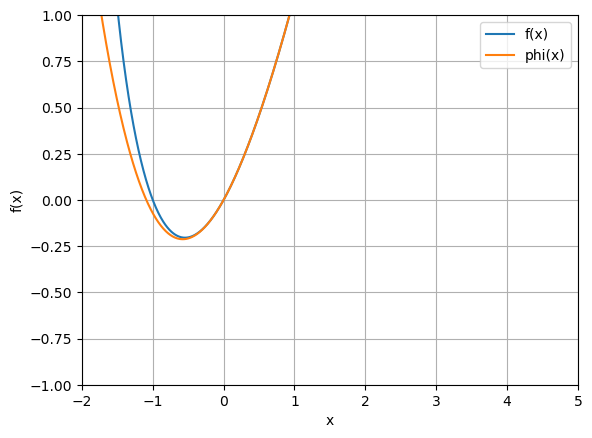

In [40]:
x = np.linspace(-2, 5, 1000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-2, 5)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

На графике видно, что на отрезке $[0, 1]$ совпадение практически идеальное, однако на более широком отрезке, различия существенны. Посмотрим на отклонение.

In [41]:
x = np.linspace(0, 1, N)

print(mse(x))

7.119289320966203e-11


Предположение о практически идельном совпадении на отрезке $[0, 1]$ подтверждается отклонением, которое равно $7.12*10^{-11}$. Посмотрим на отклонени на отрезке $[-1.99, 5]$

In [42]:
x = np.linspace(-1.99, 5, N)

print(mse(x))

7.729244406872342


Отклонение равно $7.73$, что является значительным показателем, поэтому либо необходимо повысить степень многочлена, либо увеличить количество точек.

Ради интереса выберем второй вариант, пусть количество точек $N = 50$. Будем использовать многочлен той же степени. Сразу будем рассматривать коэффициенты.

In [43]:
N = 50
n = 5

def system():
    global N, n, a, b
    
    A = np.zeros((n, N))
    B = np.zeros((n, 1))

    x = np.linspace(a, b, N)
     
    for k in range(n):
        for i in range(N):
            A[k, i] = np.sum(x**(i+k))

        B[k] = np.sum(f(x) * (x**k))

    return A, B

A, B = system()

coef = system_solution.single_division_scheme(A, B, n)

print(coef)

[[-1.96130226e-05]
 [ 6.93862139e-01]
 [ 4.94468309e-01]
 [-1.08438105e-01]
 [ 1.87563144e-02]]


Коэффициенты получились следующими $c_0 = -1.96130226 * 10^{-5}, c_1 = 0.69386214, c_2 = 0.49446831, c_3 = -0.10843811, c_4 = 0.01875631.$
Рассмотрим поведение функций на отрезке $[-2, 5].$

C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: divide by zero encountered in log
  return x * np.log(x + 2)


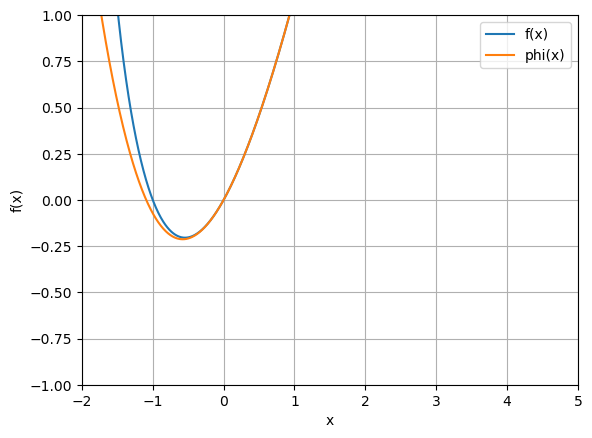

In [44]:
x = np.linspace(-2, 5, 1000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-2, 5)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Не сложно заметить, что больших изменений на графике не произошло, проверим это с помощью отклонения.

In [45]:
x = np.linspace(0, 1, N)

print(mse(x))

5.452157181039786e-11


На отрезке $[0, 1]$ отклонение незначительно увеличилось.

In [46]:
x = np.linspace(-1.99, 5, N)

print(mse(x))

2.5831496094345856


На отрезке $[-1.99, 5]$ отклонение заметно уменьшилось.

Однако я считаю, что наилучшим шагом будет сразу увеличить степень многочлена до восьмой.

#### Построение многочлена восьмой степени

[[-1.75195775e-09]
 [ 6.93147340e-01]
 [ 4.99996421e-01]
 [-1.24965543e-01]
 [ 4.14906756e-02]
 [-1.50960922e-02]
 [ 5.26349870e-03]
 [-1.43101835e-03]
 [ 2.07010178e-04]]


C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x + 2)


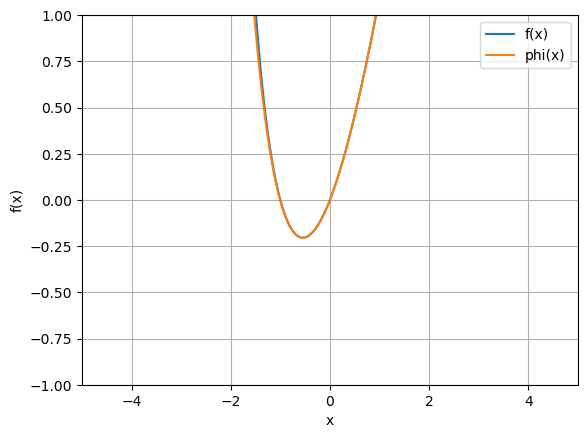

In [47]:
n = 9

m = M()

coef = system_solution.single_division_scheme(G(n, a, b), m, n)

print(coef)

x = np.linspace(-5, 5, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

График выглядит вполне приемлимо при количестве точек $N = 50$ и степени многочлена, равной восьми. Посмотрим, как выглядит отклонение.

In [48]:
x = np.linspace(0, 1, N)

print(mse(x))

1.9322627862362974e-19


На отрезке $[0, 1]$ значение отклонения сильно уменьшилось и стало практически равным нулю, что меня вполне устраивает.

In [49]:
x = np.linspace(-1.99, 5, N)

print(mse(x))

20.436877922839525


Однако на отрезке $[-1.99, 5]$ оно значительно увеличилось, что может говорить о том, что выше графики значительно расходятся.

[[-1.75195775e-09]
 [ 6.93147340e-01]
 [ 4.99996421e-01]
 [-1.24965543e-01]
 [ 4.14906756e-02]
 [-1.50960922e-02]
 [ 5.26349870e-03]
 [-1.43101835e-03]
 [ 2.07010178e-04]]


C:\Users\Morzhig\AppData\Local\Temp\ipykernel_17588\2299164387.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x + 2)


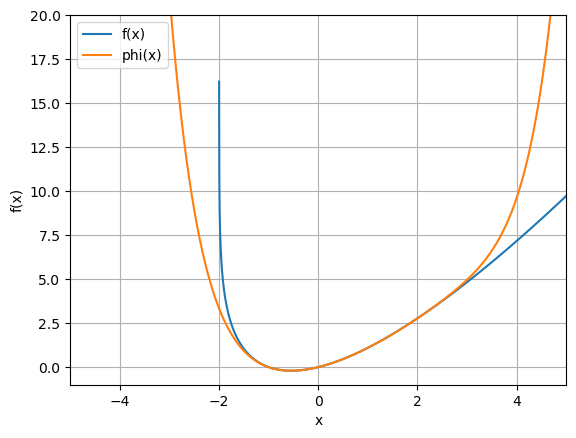

In [50]:
n = 9

m = M()

coef = system_solution.single_division_scheme(G(n, a, b), m, n)

print(coef)

x = np.linspace(-5, 5, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x), label='phi(x)')
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 20)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

### Вывод

Ситуация аналогична среднеквадратичному приближению, на рассматриваемом отрезке удалось получить практически идеальное приближения, однако, расширив отрезок, получили то, что различия значительны.